# Complex Machine Learning Datasets

---

- Author: Quan Nguyen

---


# Dataset  and Machine Learning Model overview

- Data source: [Metabolic Syndrome](https://data.world/informatics-edu/metabolic-syndrome-prediction)  
- The dataset for analysis came from the NHANES initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc. that might contribute to the model but we will not sure, until we test the model.
- The target of this dataset is to predict the diagnosis of metabolic syndrome.
- One row represents a patient's info 
- This is a classification problem

In [145]:
#pandas
import pandas as pd
#numpy
import numpy as np 
#matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Warning
import warnings
warnings.filterwarnings("ignore")

In [146]:
ms = pd.read_csv("D:\Lesson\Stack 3\Metabolic  Syndrome (1).csv")
ms.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [147]:
print(f"There is {ms.shape[0]} rows, and {ms.shape[1]} columns in the data")

There is 2401 rows, and 15 columns in the data


## Data Cleaning

### Delete Unneccesary Columns

In [148]:
ms['seqn'].nunique()

2401

this columns has all different values it might be the identifying number of a patient, so we will drop this column.

In [149]:
ms.drop(columns=['seqn'], inplace=True)

### Delete Duplicated Rows

In [150]:
print(f'The dataset has {ms.duplicated().sum()} duplicated values')

The dataset has 0 duplicated values


### Handling missing value

In [151]:
ms.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [152]:
print(f'the data set has {ms.isna().sum().sum()} missing values')

the data set has 436 missing values


In [153]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 262.7+ KB


In [154]:
#convert columns names to lower case to make them easier to remember
ms.columns = ms.columns.str.lower()
ms.columns


Index(['age', 'sex', 'marital', 'income', 'race', 'waistcirc', 'bmi',
       'albuminuria', 'uralbcr', 'uricacid', 'bloodglucose', 'hdl',
       'triglycerides', 'metabolicsyndrome'],
      dtype='object')

***There is no missing values on our target***

> We will not handle missing value because when we split the data set and train the data we will use onehotencoder and simple imputer to handle these missing values

### Checking inconsistency of the values

In [155]:
ms.describe(include='number')

,age,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [156]:
ms['albuminuria'].value_counts()

0    2089
1     254
2      58
Name: albuminuria, dtype: int64

this column should be ordinal, so we have to change it to categorical type

In [160]:
ms['albuminuria'] = ms['albuminuria'].astype('object')

In [162]:
ms.describe(include='object')

,sex,marital,race,albuminuria,metabolicsyndrome
count,2401,2193,2401,2401,2401
unique,2,5,6,3,2
top,Female,Married,White,0,No MetSyn
freq,1211,1192,933,2089,1579


In [116]:
ms['marital'].value_counts()

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: marital, dtype: int64

Delete this unnecessary column, as it will not contribute in the dataset.   

In [117]:
ms.drop(columns=['marital'], inplace=True)

In [118]:
ms['race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: race, dtype: int64

In [119]:
 ms.drop(columns=['race'], inplace=True)

Delete this unnecessary column, as it will not contribute in the dataset.   

In [120]:
ms['sex'].value_counts()

Female    1211
Male      1190
Name: sex, dtype: int64

***There is no inconsistencies value being detected***

## Data Visualization

### Identify Outliers for numerical columns using EDA

In [121]:
def boxplot(df, col):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(data=df, x=col)
    ax.set_title("Boxplot of {}".format(col), fontweight='bold')
    ax.set_xlabel('Values')
    ax.set_ylabel(col)
    plt.show();

In [122]:
def identify_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = pd.DataFrame(columns=df.columns)
    columns_outlier = df[col].between(lower_bound, upper_bound, inclusive =False)
    outliers[col] =df[col][~columns_outlier]
    return outliers
    

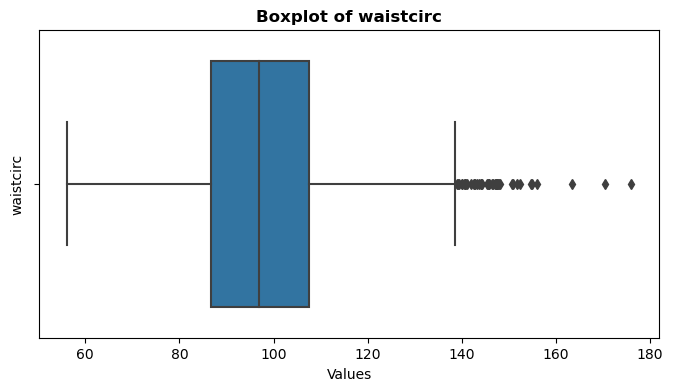

In [123]:
boxplot(ms, 'waistcirc')

In [124]:
identify_outlier(ms, 'waistcirc')

,age,sex,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,140.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,147.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,154.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2365,NaN,NaN,NaN,142.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2379,NaN,NaN,NaN,142.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
ms = ms.drop(identify_outlier(ms, 'waistcirc').index)
identify_outlier(ms, 'waistcirc')

,age,sex,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


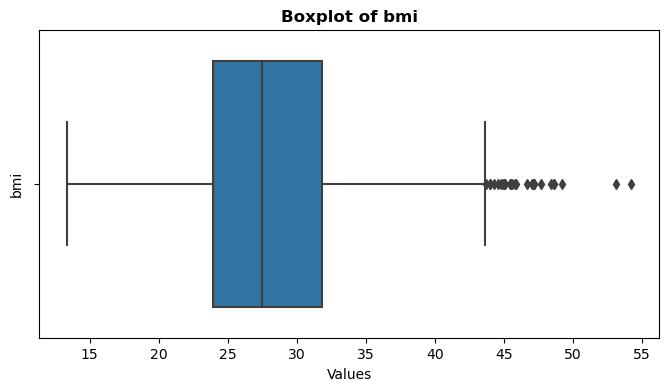

In [128]:
boxplot(ms, 'bmi')

In [131]:
ms = ms.drop(identify_outlier(ms, 'bmi').index)
identify_outlier(ms, 'bmi')

,age,sex,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


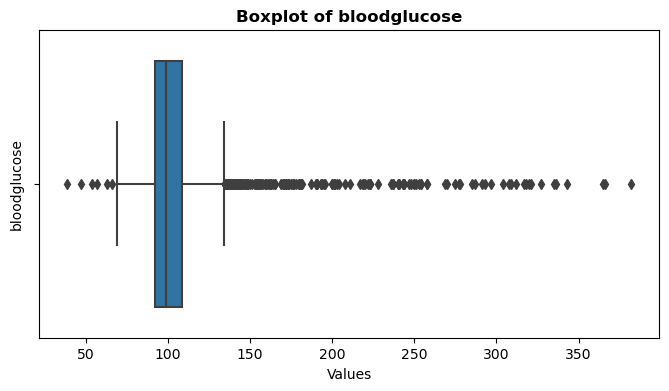

In [132]:
boxplot(ms, 'bloodglucose')

In [65]:
identify_outlier(ms, 'bloodglucose')

,age,sex,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309,NaN,NaN,NaN
2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN
2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292,NaN,NaN,NaN


In [136]:
ms = ms.drop(identify_outlier(ms, 'bloodglucose').index)
identify_outlier(ms, 'bloodglucose')

,age,sex,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


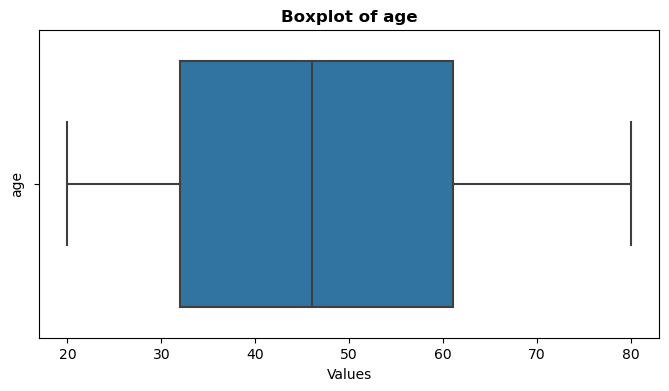

In [135]:
boxplot(ms, 'age')

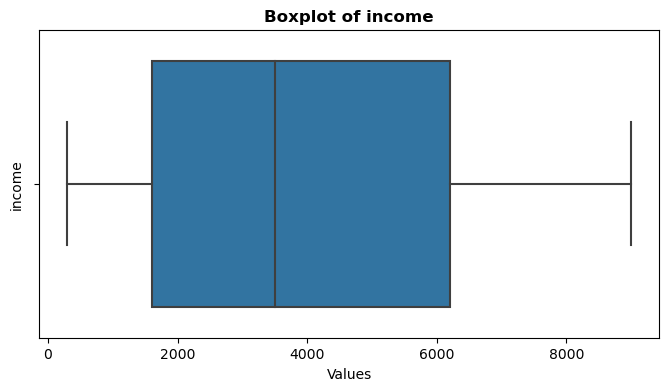

In [76]:
boxplot(ms, 'income')

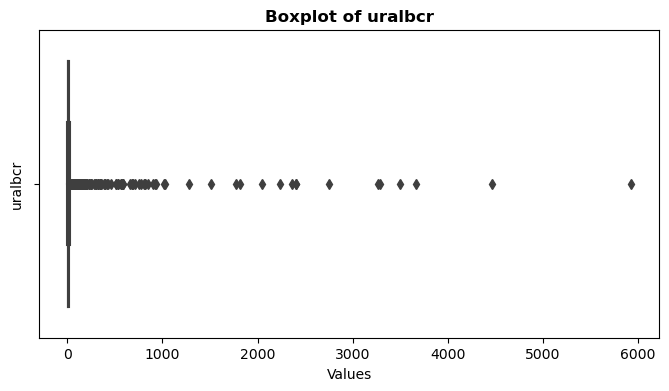

In [163]:
boxplot(ms, 'uralbcr')

In [164]:
identify_outlier(ms, 'uralbcr')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.67,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.14,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.41,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.46,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.73,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.63,NaN,NaN,NaN,NaN,NaN
2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.70,NaN,NaN,NaN,NaN,NaN
2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.82,NaN,NaN,NaN,NaN,NaN
2373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.75,NaN,NaN,NaN,NaN,NaN


In [171]:
ms = ms.drop(identify_outlier(ms, 'uralbcr').index)
identify_outlier(ms, 'uralbcr')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


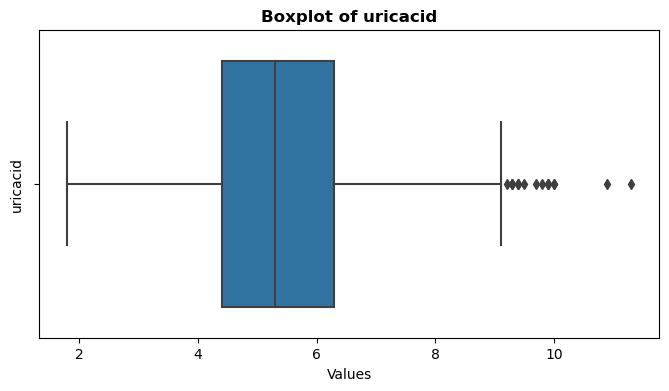

In [172]:
boxplot(ms, 'uricacid')

In [173]:
identify_outlier(ms, 'uricacid')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3,NaN,NaN,NaN,NaN
597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.7,NaN,NaN,NaN,NaN
861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN
1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.8,NaN,NaN,NaN,NaN
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9,NaN,NaN,NaN,NaN
1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN
1348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN


In [175]:
ms = ms.drop(identify_outlier(ms, 'uricacid').index)
identify_outlier(ms, 'uricacid')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


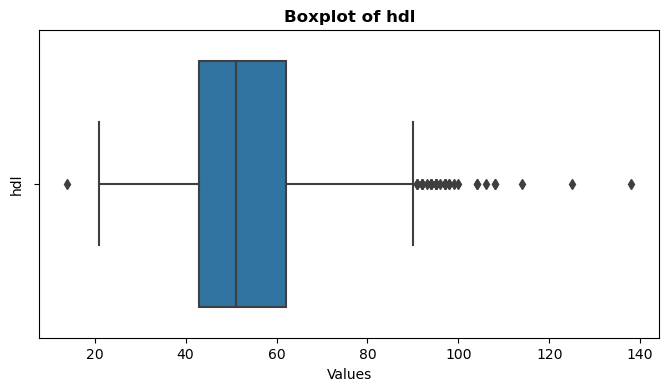

In [176]:
boxplot(ms, 'hdl')

In [177]:
identify_outlier(ms, 'hdl')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,NaN
621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN
686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,NaN
746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,NaN
782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,NaN,NaN
790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,NaN


In [179]:
ms = ms.drop(identify_outlier(ms, 'hdl').index)
identify_outlier(ms, 'hdl')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


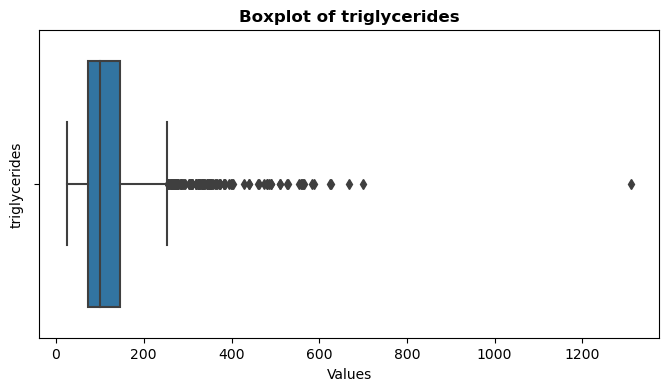

In [180]:
boxplot(ms, 'triglycerides')

In [181]:
identify_outlier(ms, 'triglycerides')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267,NaN
2288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,489,NaN
2322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267,NaN
2331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,NaN


In [186]:
ms = ms.drop(identify_outlier(ms, 'triglycerides').index)
identify_outlier(ms, 'triglycerides')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome


In [187]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1607 non-null   int64  
 1   sex                1607 non-null   object 
 2   marital            1456 non-null   object 
 3   income             1535 non-null   float64
 4   race               1607 non-null   object 
 5   waistcirc          1565 non-null   float64
 6   bmi                1594 non-null   float64
 7   albuminuria        1607 non-null   object 
 8   uralbcr            1607 non-null   float64
 9   uricacid           1607 non-null   float64
 10  bloodglucose       1607 non-null   int64  
 11  hdl                1607 non-null   int64  
 12  triglycerides      1607 non-null   int64  
 13  metabolicsyndrome  1607 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 188.3+ KB


### EDA for target and features

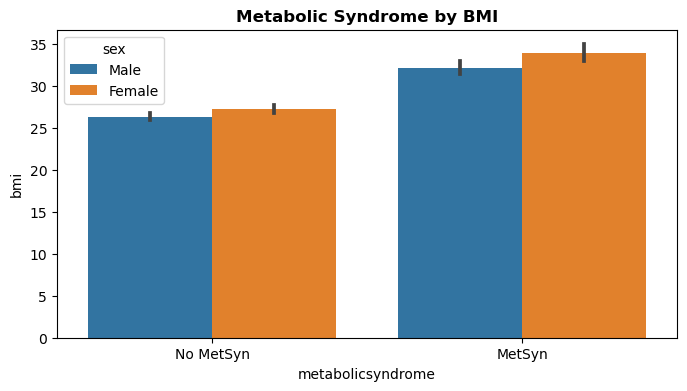

In [196]:
fig,ax = plt.subplots(figsize = (8, 4))
sns.barplot(x=ms['metabolicsyndrome'], y=ms['bmi'], hue=ms['sex'], ax=ax,
            data=ms);
ax.set_title('Metabolic Syndrome by BMI', fontweight='bold');

- We can see that woman asymptomatic to metabolic syndrome more than man.
- we can also see that people with high bmi are tend to be asymptomatic to metabolic syndrome

Text(0.5, 1.0, 'Metabolic Syndrome Correlation')

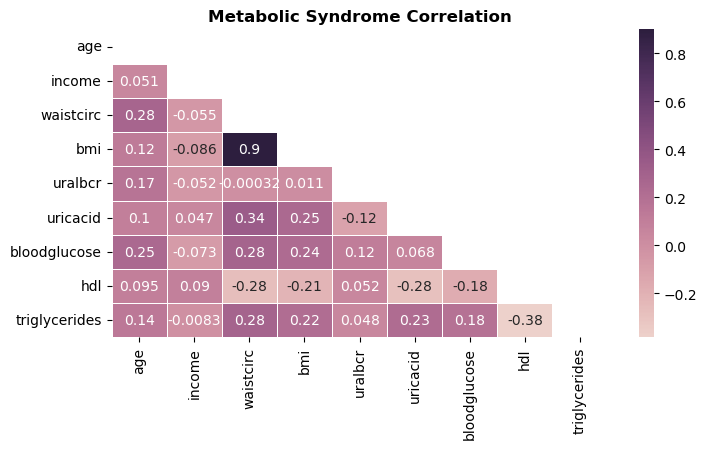

In [216]:
# To get a triangle correlation map and hide duplicate values as well as the diagonal of all the values with themselves, use the mask argument
# We will first define the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe we just made
# np.triu() will just return the upper triangle of any array 
# by masking (blocking) the upper triangle in our heatmap, we are left with only the lower triangle
mask = np.triu(np.ones_like(ms.corr()))
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(ms.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot = True, mask = mask,linewidth=.7);
ax.set_title('Metabolic Syndrome Correlation', fontweight='bold')

In [220]:
def scatter_plot(df, y, x):
  # Calculate the correlation
  figsize=(6,4)
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"Scatter Plot of {x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show();

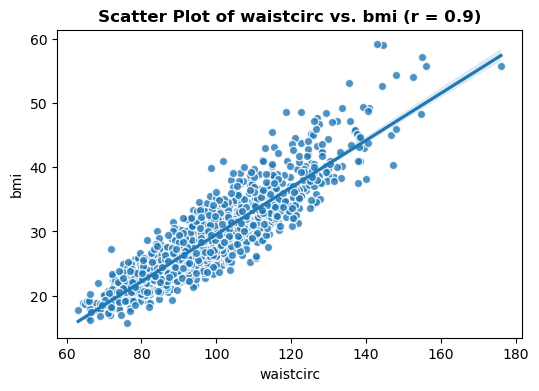

In [221]:
scatter_plot(ms,'bmi', 'waistcirc');

- There is a strong relation between bmi and the waist circumference which is very obvious, so we would not choose this one to recommend for our stakeholders.

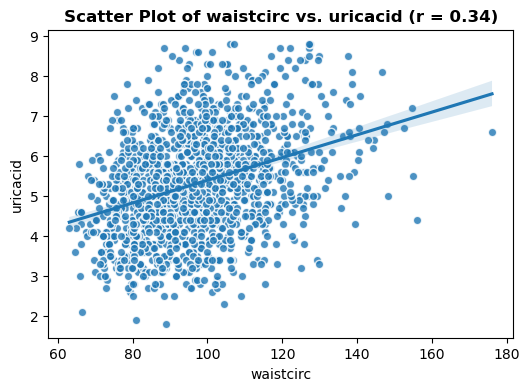

In [223]:
scatter_plot(ms,'uricacid', 'waistcirc');

- This strong correlation shows that the Waist circumference is correlated to the uric acid that found in our blood, so we can choose this correlation to recommend for stakeholders that patient can easily get hyperuricemia a.k.a gout when being overweight.